# Exploratory Data Analysis

## 1. **EDA Objective**

### The goal of this EDA is to understand patterns related to loan default risk and identify data quality issues that may affect modeling.


## 2. Dataset Overview

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("../Loan_default.csv")

In [3]:
df.shape

(255347, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [11]:
df.sample()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
207239,BXYZEHLDNK,63,89938,45417,441,32,2,8.95,48,0.55,Bachelor's,Unemployed,Divorced,No,Yes,Education,Yes,1


- Dataset contains ~255k records → large enough for robust modeling

- 18 columns is moderate feature space

Mix of:

- Numerical features (financial, loan-related)

- Categorical features (demographic, status flags)

- Target variable: Default (binary)

No missing values reported at schema level

## 3. Target Variable

In [12]:
df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

In [14]:
df['Default'].value_counts(normalize=True)*100

Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64

Text(0, 0.5, 'Count')

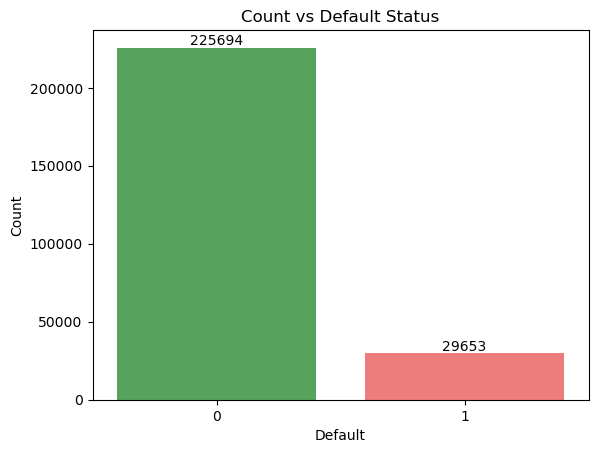

In [28]:
counts = df['Default'].value_counts()

ax = sns.barplot(
    x=counts.index,
    y=counts.values,
    hue=counts.index,
    palette=['#4CAF50', '#FF6B6B'],
    legend=False
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Count vs Default Status")
plt.xlabel("Default")
plt.ylabel("Count")


## Class Imbalance Analysis

### Observation
- **Class imbalance exists** in the target variable.
- **Non-defaulters heavily outnumber defaulters**.
- There are **roughly 1 defaulter for every 8 non-defaulters**, indicating a significant skew.

---

### Business Implications
- **Defaulters represent a minority but high-cost class**.
- **False negatives (missed defaulters)** are particularly expensive, as they may lead to financial loss.
- The business objective should prioritize **identifying defaulters accurately**, even at the cost of some false positives.

---

### Modeling Implications
- **Accuracy alone will be misleading** due to class imbalance.
- Evaluation must include metrics such as:
  - **Recall** (especially for the defaulter class)
  - **Precision**
  - **F1-score**
  - **ROC-AUC**
- **Class imbalance handling techniques** (e.g., class weighting, resampling) may be required in later stages of modeling.


In [31]:
## missing values check
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

- There are no missing values in the dataframe

## 4. Feature Groups

## 5. EDA Questions / Hypotheses

## 6. EDA Checklist